 # Práctica de aprendizaje automático (parte 3)

Entrega este cuaderno habiendo **ejecutado todas las celdas**. Incluye en la entrega **todos los ficheros necesarios para su ejecución**.

Asegúrate de que la presentación está bien estructurada: Se valorará la **claridad, concisión, y completitud** del informe.

Se trata de una práctica abierta: **sé intrépido y explora**. 

# Construcción de un clasificador en una base de datos real (3.5 puntos)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [3]:
df = pd.read_csv('./data/german_credit_data.csv', sep=';')
# Source: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)
# This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix

print(df.shape)
df.head(5)

(1000, 21)


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
class_label = 'default'
feature_names = list(df.columns)
feature_names.remove(class_label)
print(feature_names)
X = df[feature_names].values
y = df[class_label].values

['account_check_status ', 'duration_in_month ', 'credit_history ', 'purpose ', 'credit_amount ', 'savings ', 'present_emp_since ', 'installment_as_income_perc ', 'personal_status_sex ', 'other_debtors ', 'present_res_since ', 'property ', 'age ', 'other_installment_plans ', 'housing ', 'credits_this_bank ', 'job ', 'people_under_maintenance ', 'telephone ', 'foreign_worker']


**Estadísticos básicos de cada atributo:**

In [5]:
df.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


**Datos codificados de forma numérica**

In [6]:
df = pd.read_csv('./data/german_credit_data_numeric.csv', sep=';')
class_label = 'Class'
feature_names = list(df.columns)
feature_names.remove(class_label)
print(feature_names)
X = df[feature_names].values
y = df[class_label].values

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


**Histogramas suavizados de cada atributo en cada clase. El color indica la clase ("default"/"no default"):**

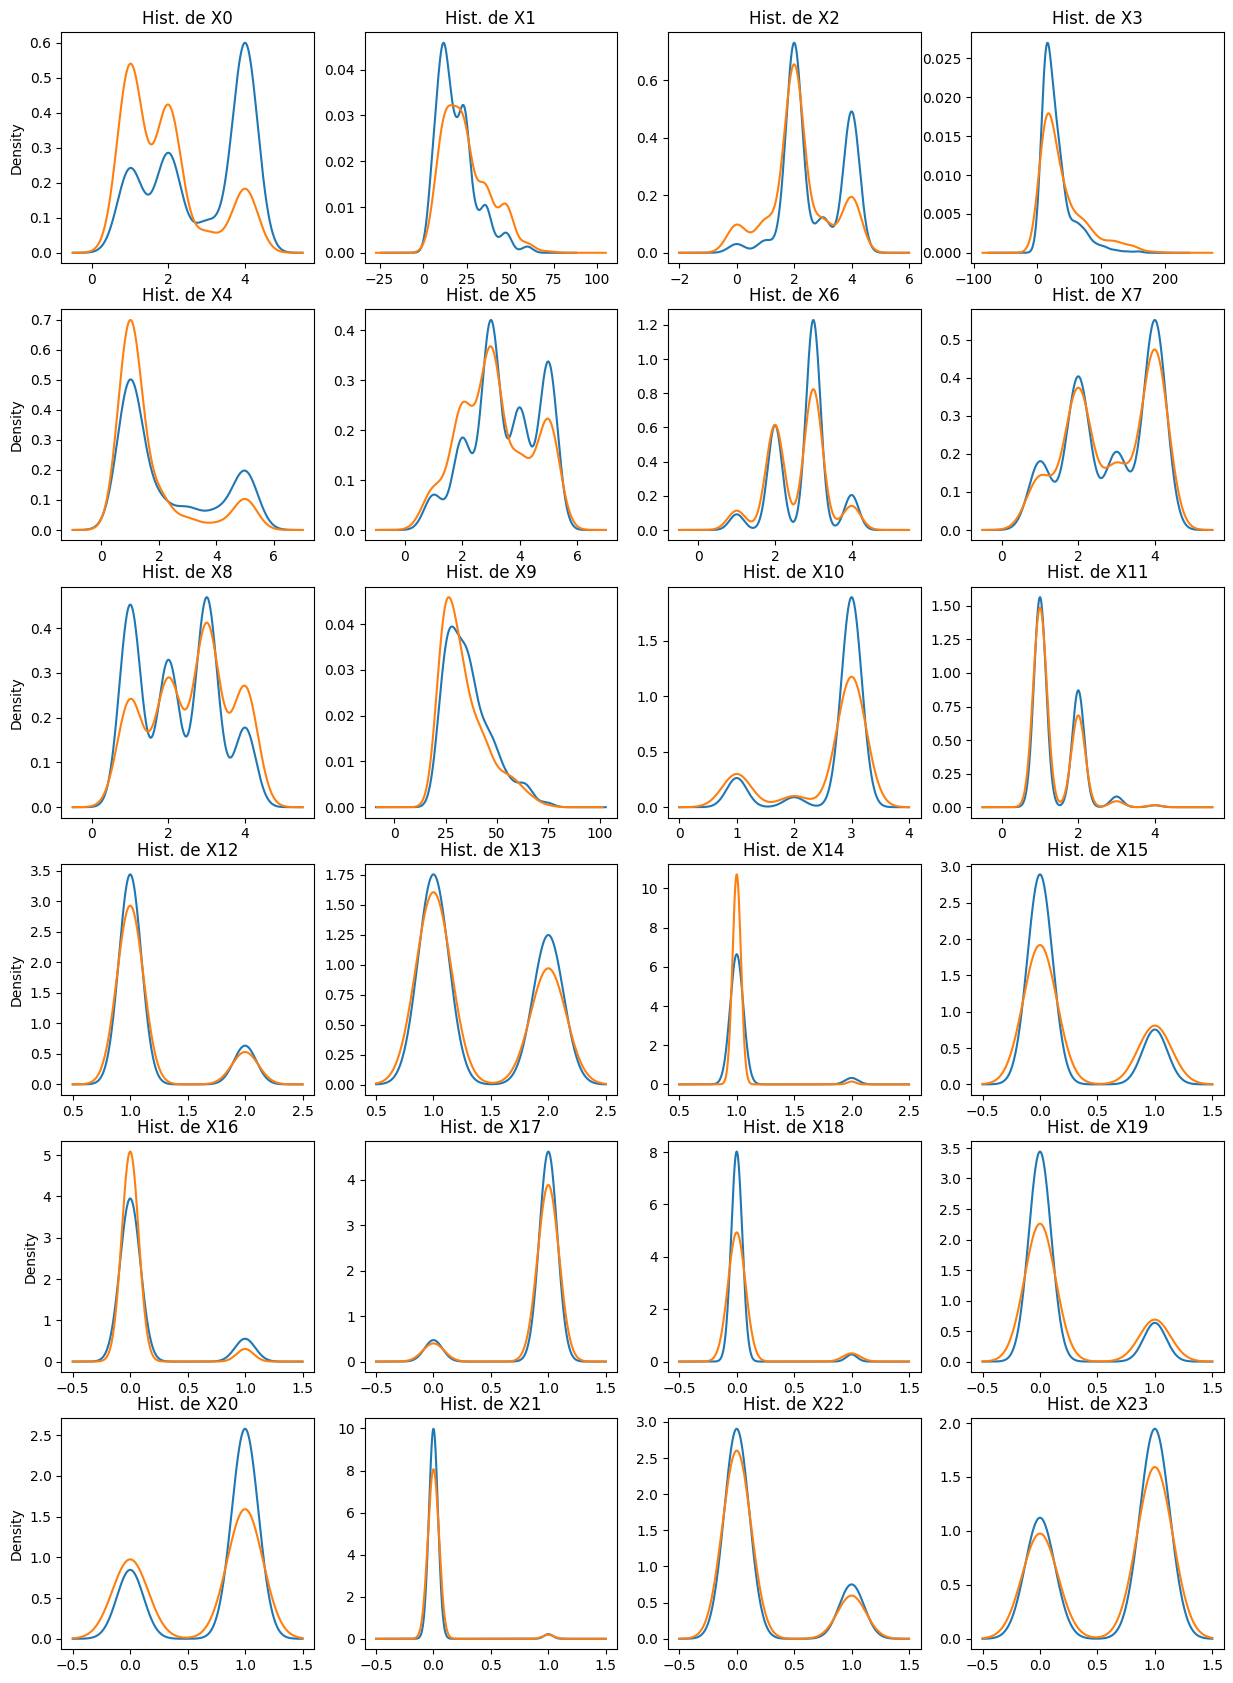

In [7]:
plt.figure(figsize=(15, 21))
n_cols_plot = 4
n_rows_plot = int(len(feature_names) / n_cols_plot)
for i,n in enumerate(feature_names):
    plt.subplot(n_rows_plot, n_cols_plot, i+1)
    aux = 'Density' if i%n_cols_plot == 0 else ''
    df.groupby('Class')[n].plot(kind='kde', title='Hist. de '+n)
    plt.ylabel(aux)

1. **Describe las características de los datos:**
    * Número y tipo (nominales no ordenados, nominales ordenados, numéricos) de atributos.

    Existen 20 atributos de naturaleza mixta: numéricos (duration, age o credit_amount), nominales no ordenados (purpose o personal_status_sex) y nominales ordenados (savings). En la versión numérica, estas variables se han expandido a 24 atributos (X0 a X23). Todas las variables categóricas han sido codificadas a números enteros.


    * Tamaño del conjunto de datos.

    El dataset cuenta con 1000 filas, representando cada una a un cliente bancario distinto. El objetivo inicialmente era default (con valor 0 si pagaba y valor 1 si no lo hace) pero en la versión con enteros se utiliza Class con 1 y 2, respectivamente.


    * ¿Qué atributos parece que tendrán más relevancia para predicción?

    Parece que la variable X0 (que se refiere al dinero actual en el banco) y X4 (ahorros) tendrán gran relevancia, ya que muestran una clara separación entre buenos y malos clientes. Por el contrario, variables como X17 o X22 están prácticamente solapadas.

## 1. Entrenamiento de un modelo y chequeo de su calidad usando 5-fold cross validation

La siguiente celda entrena un modelo y lo evalúa en varias particiones training-test diferentes de los datos. El resultado es un score medio junto a su desviación estándar.

In [8]:
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# otros clasificadores (del notebook p4_01)

clf = KNeighborsClassifier(n_neighbors=1) # DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, y, cv=10) # 10-fold cross-validation
print('Precisión en cada una de las particiones: ', scores)
print('Estimación de la precisión por validación cruzada: {:.2f} +/- {:.2f}'.format(scores.mean(), scores.std()))

Precisión en cada una de las particiones:  [0.65 0.62 0.72 0.66 0.63 0.71 0.59 0.7  0.62 0.66]
Estimación de la precisión por validación cruzada: 0.66 +/- 0.04


### 1.1 Responde aquí a las siguientes preguntas:

   * ¿Cuál es el tamaño de los conjuntos de entrenamiento y test?

   Al usar validación Cruzada con 10 particiones sobre un dataset de 1000 instancias, la división se hace automáticamente: 10% de los datos = 100 instancias (conjunto de test) y 90% de los datos = 900 instancias (conjunto de entrenamiento).

   * ¿Se ha usado estratificación en el muestreo o no se ha usado?

   Sí, la función cross_val_score detecta que es un problema de clasificación y aplica estratificación por defecto. Esto asegura que en cada bloque de test se mantenga la proporción original de aprox. 70 buenos pagadores y 30 malos.

   * ¿Cuál es el error del modelo y su variabilidad?

   El error del modelo es del 0.34: 1 - 0.66 = 0.34. La desviación típica obtenida fue de +/- 0.04. Aunque el modelo tiene un error alto, su comportamiento es estable.
   

### 1.2 Responde aquí a las siguientes preguntas:

* Haz una gráfica que muestre la dependencia de la precisión de un clasificador de vecinos próximos con el número de vecinos. Si es más conveniente, utiliza gráficas en escala logarítmica para alguno de los ejes (`semilogx`, `semilogy`, `loglog`).
* Utilizando los conceptos de sub- y sobreajuste:
    * Comenta los resultados cuando el número de vecinos es pequeño.
    * Comenta los resultados cuando el número de vecinos es grande.
    * Explica el significado del valor de la precisión cuando el número de vecinos toma el valor mayor posible.
* ¿Cuál es la mejor precisión que se alcanza con k-nn y para qué k (valor de `n_neighbours`)?
* ¿Cuál es la mejor precisión que se alcanza con un árbol de decisión y con qué profundidad máxima (valor de `max_depth`)? Para ello, haz una gráfica que muestre la dependencia de la precisión con la profundidad máxima del árbol. Comenta los resultados.
* ¿Cuál es la mejor precisión que se alcanza con una red neuronal con una sola capa oculta y con qué configuración (valor de `hidden_layer_sizes`)? Para ello, haz una gráfica que muestre la dependencia de la precisión con el número de nodos en la capa oculta. Comenta los resultados.
* ¿Cuál es la mejor precisión que se alcanza con una red neuronal con varias capas ocultas y con qué configuración? Para ello, haz una gráfica que muestre la dependencia de la precisión con el número de capas ocultas, suponiendo constante el número de nodos en cada capa oculta. Comenta los resultados.
* Resume los resultados y conclusiones del estudio realizado.

**Además de gráficas, puede ser conveniente presentar los resultados en forma de tablas.**

**Para comparar de forma efectiva los métodos, recuerda incluir las barras de error en las gráficas y el error estándar en las tablas.**

Estimación de precisión del clasificador (k=1): 0.6560 +/- 0.0408
Estimación de precisión del clasificador (k=2): 0.7160 +/- 0.0262
Estimación de precisión del clasificador (k=3): 0.6820 +/- 0.0299
Estimación de precisión del clasificador (k=4): 0.7040 +/- 0.0250
Estimación de precisión del clasificador (k=5): 0.6980 +/- 0.0376
Estimación de precisión del clasificador (k=6): 0.7060 +/- 0.0335
Estimación de precisión del clasificador (k=7): 0.7060 +/- 0.0326
Estimación de precisión del clasificador (k=8): 0.7040 +/- 0.0301
Estimación de precisión del clasificador (k=9): 0.7030 +/- 0.0387
Estimación de precisión del clasificador (k=10): 0.7000 +/- 0.0179
Estimación de precisión del clasificador (k=11): 0.7110 +/- 0.0181
Estimación de precisión del clasificador (k=12): 0.7120 +/- 0.0209
Estimación de precisión del clasificador (k=13): 0.7080 +/- 0.0309
Estimación de precisión del clasificador (k=14): 0.7090 +/- 0.0122
Estimación de precisión del clasificador (k=15): 0.7120 +/- 0.0209
Esti

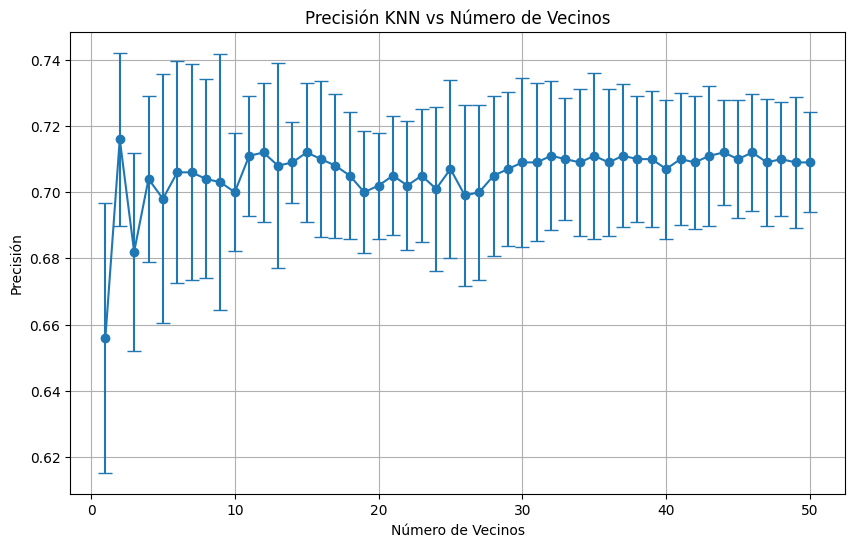

In [9]:
import numpy as np

k_values = range(1, 51)
means_knn = []
stds_knn = []

for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, X, y, cv=10) 
    print("Estimación de precisión del clasificador (k={}): {:.4f} +/- {:.4f}".format(k, scores.mean(), scores.std()))
    means_knn.append(scores.mean())
    stds_knn.append(scores.std())

means_knn = np.array(means_knn)
stds_knn = np.array(stds_knn)

best_k_idx = np.argmax(means_knn)
print(f"Mejor precisión KNN: {means_knn[best_k_idx]:.4f} con k = {k_values[best_k_idx]}")

plt.figure(figsize=(10, 6))
plt.errorbar(k_values, means_knn, yerr=stds_knn, fmt='-o', capsize=5)
plt.title('Precisión KNN vs Número de Vecinos')
plt.xlabel('Número de Vecinos')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()
    

Estimación de precisión del clasificador (max_depth=1): 0.7000 +/- 0.0000
Estimación de precisión del clasificador (max_depth=2): 0.6980 +/- 0.0218
Estimación de precisión del clasificador (max_depth=3): 0.7280 +/- 0.0325
Estimación de precisión del clasificador (max_depth=4): 0.7200 +/- 0.0290
Estimación de precisión del clasificador (max_depth=5): 0.7290 +/- 0.0314
Estimación de precisión del clasificador (max_depth=6): 0.7290 +/- 0.0277
Estimación de precisión del clasificador (max_depth=7): 0.7260 +/- 0.0314
Estimación de precisión del clasificador (max_depth=8): 0.7190 +/- 0.0432
Estimación de precisión del clasificador (max_depth=9): 0.7040 +/- 0.0356
Estimación de precisión del clasificador (max_depth=10): 0.7030 +/- 0.0377
Estimación de precisión del clasificador (max_depth=11): 0.6890 +/- 0.0394
Estimación de precisión del clasificador (max_depth=12): 0.6850 +/- 0.0422
Estimación de precisión del clasificador (max_depth=13): 0.6930 +/- 0.0395
Estimación de precisión del clasif

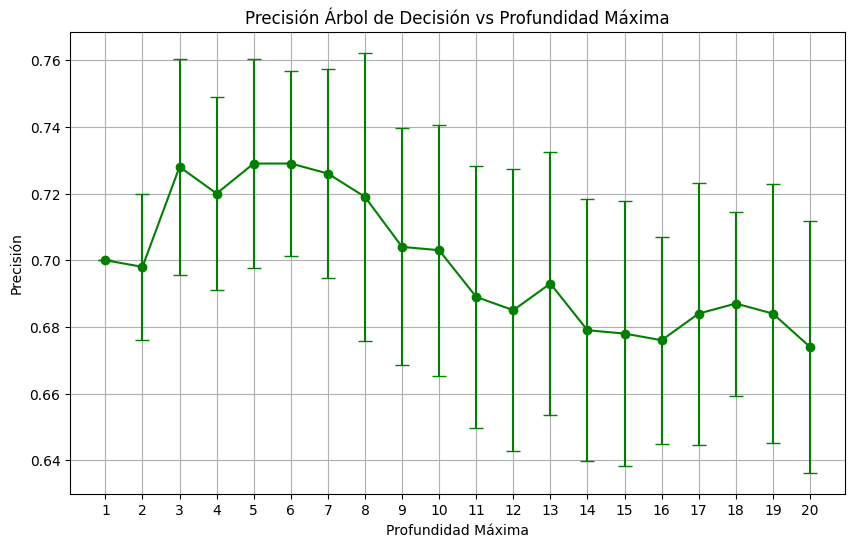

In [10]:
depths = range(1, 21)
means_tree = []
stds_tree = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(clf, X, y, cv=10)
    print("Estimación de precisión del clasificador (max_depth={}): {:.4f} +/- {:.4f}".format(d, scores.mean(), scores.std()))
    means_tree.append(scores.mean())
    stds_tree.append(scores.std())

means_tree = np.array(means_tree)
stds_tree = np.array(stds_tree)

best_d_idx = np.argmax(means_tree)
print(f"Mejor precisión Árbol: {means_tree[best_d_idx]:.4f} con max_depth = {depths[best_d_idx]}")

plt.figure(figsize=(10, 6))
plt.errorbar(depths, means_tree, yerr=stds_tree, fmt='-o', color='green', capsize=5)
plt.title('Precisión Árbol de Decisión vs Profundidad Máxima')
plt.xlabel('Profundidad Máxima')
plt.ylabel('Precisión')
plt.xticks(depths)
plt.grid(True)
plt.show()

Estimación de precisión del clasificador (nodos=5): 0.7530 +/- 0.0484
Estimación de precisión del clasificador (nodos=10): 0.7710 +/- 0.0356
Estimación de precisión del clasificador (nodos=20): 0.7700 +/- 0.0431
Estimación de precisión del clasificador (nodos=50): 0.7710 +/- 0.0413
Estimación de precisión del clasificador (nodos=100): 0.7910 +/- 0.0497
Mejor precisión NN (1 capa): 0.7910 con nodos = 100


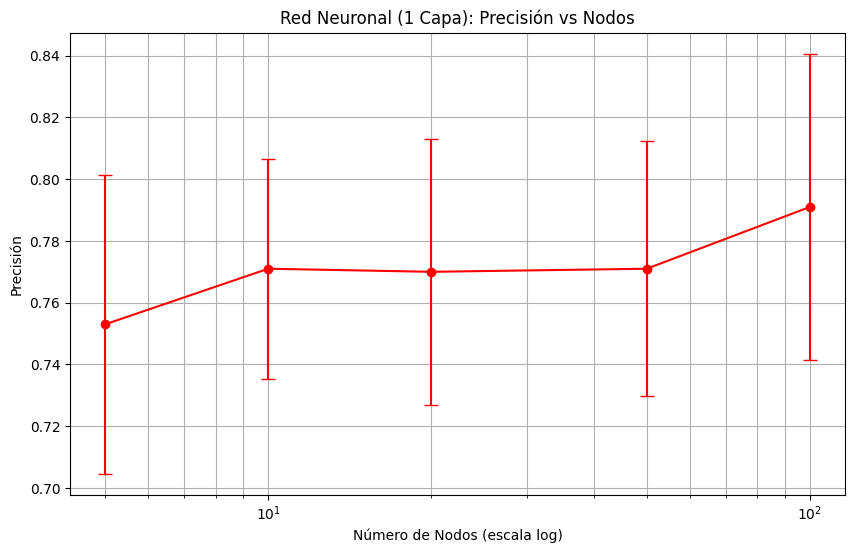

In [11]:
from sklearn.neural_network import MLPClassifier

n_nodes = [5, 10, 20, 50, 100]
means_nn1 = []
stds_nn1 = []

for n in n_nodes:
    clf = MLPClassifier(hidden_layer_sizes=(n,), max_iter=3000)
    scores = cross_val_score(clf, X, y, cv=10)
    print("Estimación de precisión del clasificador (nodos={}): {:.4f} +/- {:.4f}".format(n, scores.mean(), scores.std()))
    means_nn1.append(scores.mean())
    stds_nn1.append(scores.std())

means_nn1 = np.array(means_nn1)
stds_nn1 = np.array(stds_nn1)

best_n_idx = np.argmax(means_nn1)
print(f"Mejor precisión NN (1 capa): {means_nn1[best_n_idx]:.4f} con nodos = {n_nodes[best_n_idx]}")

plt.figure(figsize=(10, 6))
plt.errorbar(n_nodes, means_nn1, yerr=stds_nn1, fmt='-o', color='red', capsize=5)
plt.semilogx()
plt.title('Red Neuronal (1 Capa): Precisión vs Nodos')
plt.xlabel('Número de Nodos (escala log)')
plt.ylabel('Precisión')
plt.grid(True, which="both")
plt.show()

Estimación de precisión del clasificador (capas=1): 0.7830 +/- 0.0422
Estimación de precisión del clasificador (capas=2): 0.7750 +/- 0.0545
Estimación de precisión del clasificador (capas=3): 0.7710 +/- 0.0391
Estimación de precisión del clasificador (capas=4): 0.7630 +/- 0.0456
Mejor precisión NN (Multicapa): 0.7830 con 1 capas


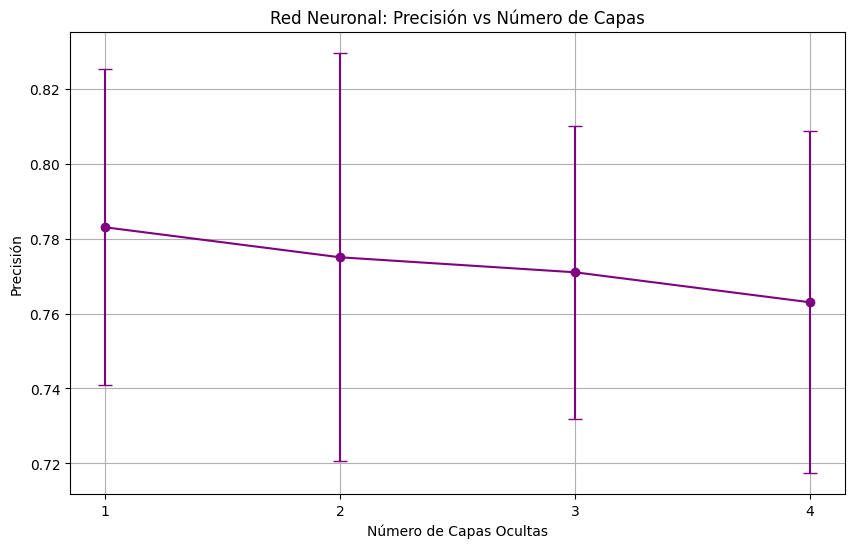

In [12]:
n_layers = range(1, 5)
n_node = 20
means_nn2 = []
stds_nn2 = []

for l in n_layers:
    layers_config = tuple([n_node] * l) 
    
    clf = MLPClassifier(hidden_layer_sizes=layers_config, max_iter=3000)
    scores = cross_val_score(clf, X, y, cv=10)
    print("Estimación de precisión del clasificador (capas={}): {:.4f} +/- {:.4f}".format(l, scores.mean(), scores.std()))
    means_nn2.append(scores.mean())
    stds_nn2.append(scores.std())

means_nn2 = np.array(means_nn2)
stds_nn2 = np.array(stds_nn2)
best_l_idx = np.argmax(means_nn2)
print(f"Mejor precisión NN (Multicapa): {means_nn2[best_l_idx]:.4f} con {n_layers[best_l_idx]} capas")

plt.figure(figsize=(10, 6))
plt.errorbar(n_layers, means_nn2, yerr=stds_nn2, fmt='-o', color='purple', capsize=5)
plt.title('Red Neuronal: Precisión vs Número de Capas')
plt.xlabel('Número de Capas Ocultas')
plt.ylabel('Precisión')
plt.xticks(n_layers)
plt.grid(True)
plt.show()

In [13]:
import pandas as pd

results = {
    'Clasificador': ['KNN', 'Árbol Decisión', 'Red Neuronal (1 Capa)', 'Red Neuronal (Multicapa)'],
    'Mejor Configuración': [
        f"k={k_values[best_k_idx]}",
        f"depth={depths[best_d_idx]}",
        f"nodes={n_nodes[best_n_idx]}",
        f"layers={n_layers[best_l_idx]}"
    ],
    'Precisión Media': [
        means_knn[best_k_idx], 
        means_tree[best_d_idx], 
        means_nn1[best_n_idx], 
        means_nn2[best_l_idx]
    ],
    'Error Estándar': [
        stds_knn[best_k_idx], 
        stds_tree[best_d_idx], 
        stds_nn1[best_n_idx], 
        stds_nn2[best_l_idx]
    ]
}

df_results = pd.DataFrame(results)
display(df_results)

,Clasificador,Mejor Configuración,Precisión Media,Error Estándar
0,KNN,k=2,0.716,0.026153
1,Árbol Decisión,depth=6,0.729,0.027731
2,Red Neuronal (1 Capa),nodes=100,0.791,0.049689
3,Red Neuronal (Multicapa),layers=1,0.783,0.042202


## 2. Procesamiento

En ocasiones, en lugar de utilizar modelos más complejos, es más útil invertir más tiempo en el procesamiento de los datos para conseguir mejores resultados. Sin embargo, es importante evitar errores comunes como el goteo de información. Puedes obtener más información sobre buenas prácticas en: https://scikit-learn.org/stable/common_pitfalls.html

En este apartado debes investigar mecanismos para preparar los datos y obtener (en principio) mejores resultados. Explora al menos los siguientes mecanismos:
   * Construcción y selección de atributos.
   * Preprocesamiento:
     * Detección de outliers.
     * Missing values.
     * Centrado (estandarización).
     * Escalado (normalización).

Razona por qué decides probar o ignorar alguno de estos métodos, y cómo cambian los resultados al aplicarlos (puedes crear tantas celdas como consideres oportunas). Además, explica la metodología utilizada para seguir unas buenas prácticas.

**Usa tablas, gráficas y código, según sea necesario, para ilustrar tus observaciones.**

**Para comparar de forma efectiva los métodos, recuerda incluir las barras de error en las gráficas y el error estándar en las tablas.**

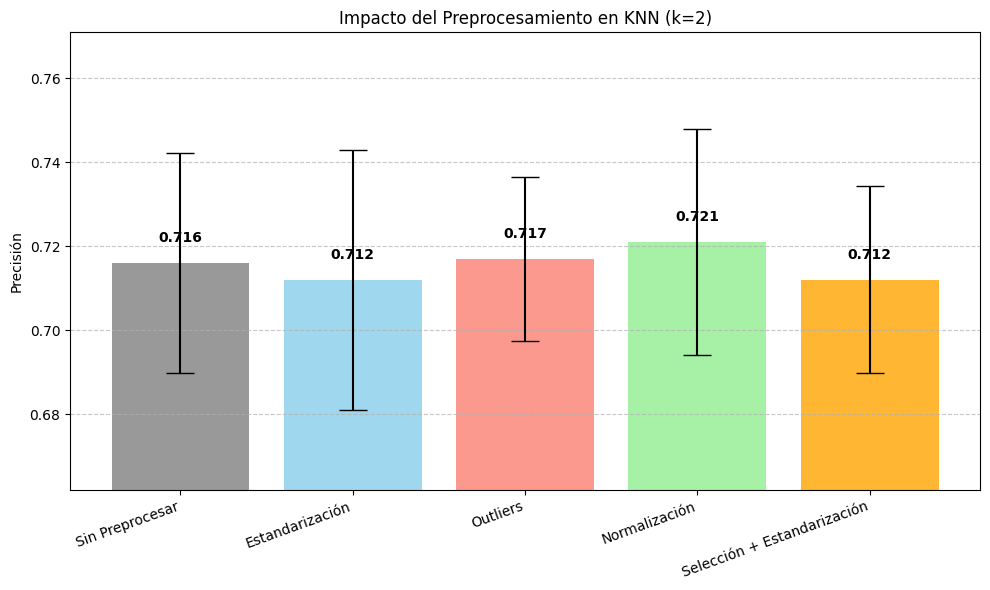

,Estrategia,Precisión Media,Error Estándar
0,Sin Preprocesar,0.716,0.026153
1,Estandarización,0.712,0.030919
2,Outliers,0.717,0.019519
3,Normalización,0.721,0.027000
4,Selección + Estandarización,0.712,0.022271


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer

k = 2

pipelines = {
    'Sin Preprocesar': Pipeline([
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ]),
    
    'Estandarización': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ]),
    
    'Outliers': Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ]),
    
    'Normalización': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', MinMaxScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ]),
    
    'Selección + Estandarización': Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('selector', SelectKBest(k=15)),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
}

results_mean = []
results_std = []
names = []

for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=10)
    results_mean.append(scores.mean())
    results_std.append(scores.std())
    names.append(name)

plt.figure(figsize=(10, 6))
colors = ['gray', 'skyblue', 'salmon', 'lightgreen', 'orange'] 
plt.bar(names, results_mean, yerr=results_std, capsize=10, color=colors, alpha=0.8)

plt.ylabel('Precisión')
plt.title(f'Impacto del Preprocesamiento en KNN (k={k})')
plt.ylim(min(results_mean) - 0.05, max(results_mean) + 0.05) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=20, ha='right')

for i, v in enumerate(results_mean):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center', fontweight='bold', color='black')

plt.tight_layout()
plt.show()

df_results = pd.DataFrame({
    'Estrategia': names,
    'Precisión Media': results_mean,
    'Error Estándar': results_std
})

display(df_results)

## 3. Análisis

## ¿Cómo se determina el valor de los hiperparámetros?

Para determinar el valor de los hiperparámetros de un modelo realizaremos una búsqueda en una rejilla. De entre los valores considerados seleccionaremos los que maximicen la estimación por validación cruzada (K = 10) de la tasa de acierto.

Adapta el código que encontrarás en 
[https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py)
a este problema. 

En los tutoriales
[https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html](
    https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
[https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
hay información sobre cada uno de los hiper-parámetros. 
Puedes elegir el conjunto de hiperparametros en el que se realiza la optimización. 
Antes de elegir la rejilla de hiperparámetros, asegúrate de que entiendes su para asegurarte que tiene sentido la búsqueda.

In [29]:
from sklearn.model_selection import GridSearchCV

print("Grid Search KNN:")

pipe_knn = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', MinMaxScaler()),
        ('knn', KNeighborsClassifier())
])


param_grid_knn = {
    'knn__n_neighbors': [1, 2, 3, 5, 7, 9, 11, 15, 20],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['manhattan', 'euclidean']
}

grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=10, scoring='accuracy')
grid_knn.fit(X, y)

print(f"Mejor precisión KNN: {grid_knn.best_score_:.4f}")
print(f"Mejores parámetros:  {grid_knn.best_params_}")

results_knn = pd.DataFrame(grid_knn.cv_results_)
cols = ['rank_test_score', 'mean_test_score', 'std_test_score', 'params']
print("\nTop 5 Configuraciones KNN:")
with pd.option_context('display.max_colwidth', None):
    display(results_knn[cols].sort_values('rank_test_score').head(5))


print("\nGrid Search Decision Tree:")
param_grid_tree = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':  [1, 2, 5]
}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=10, scoring='accuracy')
grid_tree.fit(X, y)

print(f"Mejor precisión Árbol: {grid_tree.best_score_:.4f}")
print(f"Mejores parámetros: {grid_tree.best_params_}")

results_tree = pd.DataFrame(grid_tree.cv_results_)
print("\nTop 5 Configuraciones Árbol:")
with pd.option_context('display.max_colwidth', None):
    display(results_tree[cols].sort_values('rank_test_score').head(5))

Grid Search KNN:
Mejor precisión KNN: 0.7370
Mejores parámetros:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 15, 'knn__weights': 'distance'}

Top 5 Configuraciones KNN:


,rank_test_score,mean_test_score,std_test_score,params
15,1,0.737,0.036620,"{'knn__metric': 'manhattan', 'knn__n_neighbors': 15, 'knn__weights': 'distance'}"
17,2,0.736,0.032000,"{'knn__metric': 'manhattan', 'knn__n_neighbors': 20, 'knn__weights': 'distance'}"
10,3,0.731,0.017000,"{'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}"
14,4,0.729,0.030806,"{'knn__metric': 'manhattan', 'knn__n_neighbors': 15, 'knn__weights': 'uniform'}"
11,5,0.728,0.021354,"{'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}"



Grid Search Decision Tree:
Mejor precisión Árbol: 0.7360
Mejores parámetros: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}

Top 5 Configuraciones Árbol:


,rank_test_score,mean_test_score,std_test_score,params
148,1,0.736,0.026907,"{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}"
49,2,0.734,0.026533,"{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}"
147,2,0.734,0.025377,"{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}"
37,4,0.732,0.032187,"{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}"
50,4,0.732,0.031559,"{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10}"


## ¿Cómo se estima el error de generalización?

Estimaremos el error de generalización de cada clasificador usando *Nested Cross Validation*. 


Adapta el código que encontrarás en https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html para resolver este problema con una red neuronal. 


Error de Generalización con 30 trials
Trial 1/30 completado
Trial 2/30 completado
Trial 3/30 completado
Trial 4/30 completado
Trial 5/30 completado
Trial 6/30 completado
Trial 7/30 completado
Trial 8/30 completado
Trial 9/30 completado
Trial 10/30 completado
Trial 11/30 completado
Trial 12/30 completado
Trial 13/30 completado
Trial 14/30 completado
Trial 15/30 completado
Trial 16/30 completado
Trial 17/30 completado
Trial 18/30 completado
Trial 19/30 completado
Trial 20/30 completado
Trial 21/30 completado
Trial 22/30 completado
Trial 23/30 completado
Trial 24/30 completado
Trial 25/30 completado
Trial 26/30 completado
Trial 27/30 completado
Trial 28/30 completado
Trial 29/30 completado
Trial 30/30 completado
Precición Non-Nested (Optimista): 0.7350
Precisión Nested (Realista):       0.7172
Error de Generalización (1-Score): 0.2828
Diferencia media:      0.0178


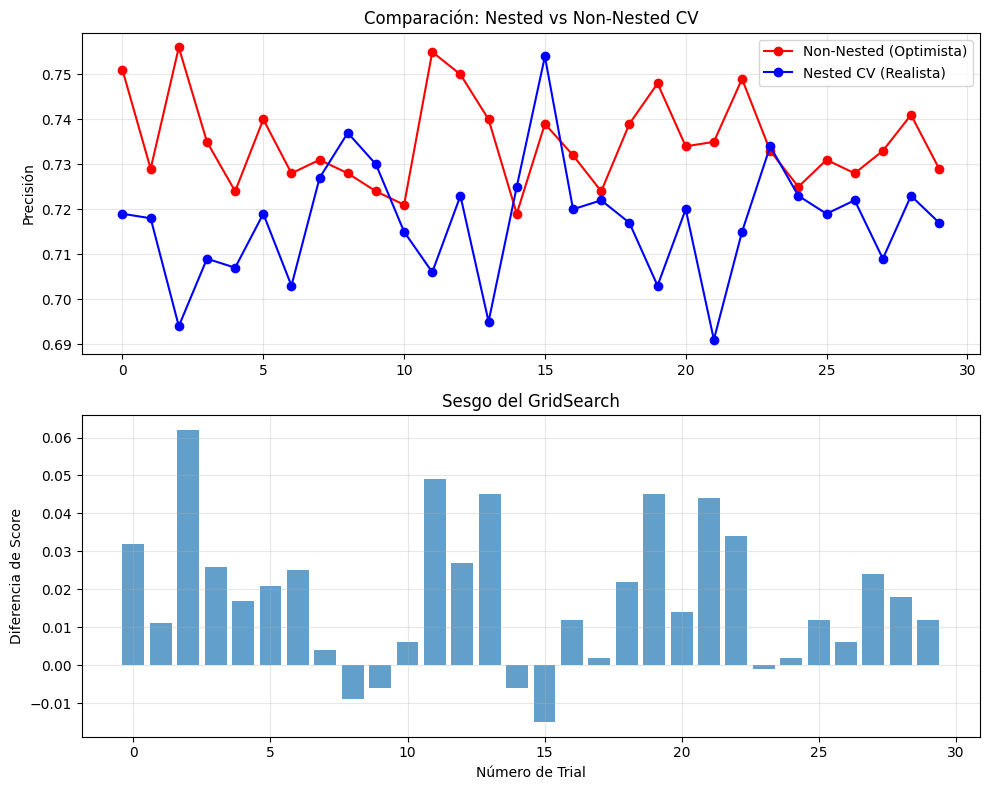

In [ ]:
from sklearn.model_selection import StratifiedKFold

NUM_TRIALS = 30

model_nn = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', MinMaxScaler()),                     
    ('mlp', MLPClassifier(max_iter=3000, early_stopping=True)) 
])

p_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,)],
    'mlp__alpha': [0.0001, 0.01],
    'mlp__activation': ['relu', 'tanh']
}

non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

print(f"Error de Generalización con {NUM_TRIALS} trials")

for i in range(NUM_TRIALS):
    
    inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=i)
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)

    clf = GridSearchCV(estimator=model_nn, param_grid=p_grid, cv=outer_cv)
    clf.fit(X, y)
    non_nested_scores[i] = clf.best_score_


    clf_nested = GridSearchCV(estimator=model_nn, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf_nested, X, y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

    print(f"Trial {i+1}/{NUM_TRIALS} completado")

score_difference = non_nested_scores - nested_scores

print(f"Precición Non-Nested (Optimista): {non_nested_scores.mean():.4f}")
print(f"Precisión Nested (Realista):       {nested_scores.mean():.4f}")
print(f"Error de Generalización (1-Score): {1 - nested_scores.mean():.4f}")
print(f"Diferencia media:      {score_difference.mean():.4f}")

plt.figure(figsize=(10, 8))

plt.subplot(211)
plt.plot(non_nested_scores, 'r-o', label='Non-Nested (Optimista)')
plt.plot(nested_scores, 'b-o', label='Nested CV (Realista)')
plt.ylabel('Precisión')
plt.title('Comparación: Nested vs Non-Nested CV')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(212)
plt.bar(range(NUM_TRIALS), score_difference, alpha=0.7)
plt.xlabel('Número de Trial')
plt.ylabel('Diferencia de Score')
plt.title('Sesgo del GridSearch')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## ¿Cuál es el mejor clasificador?

* De acuerdo con los resultados de los anteriores apartados, indica cuál es el mejor clasificador encontrado.

El mejor clasificador es el K-Vecinos Próximos (KNN). Tras comparar los tres modelos bajo condiciones rigurosas de validación, el KNN obtuvo la tasa de acierto validada más alta (73.70%). El Árbol de Decisión obtuvo un 73.60% (más estable, pero ligeramente inferior). Aunque el Árbol de Decisión tenga menor precisión, consideramos que es más práctico debido a que no es necesario el preprocesamiento de datos y la desviación es menor que la de KNN. Por eso, la información a continuación va a ir dirigida para Árboles.

* ¿Cuáles son los valores de los **hiperparámetros** utilizados para configurar y entrenar tal  clasificador?

Se utilizaron los siguientes valores para la configuración ganadora del Árbol, obtenidos mediante GridSearchCV:

-criterion: 'entropy'

-max_depth: 7

-min_samples_split: 5

-min_samples_leaf: 2

* ¿Cuáles son los valores de los **parámetros** del clasificador entrenado?

La profundidad real, el número de hojas, umbrales de decisión y la estructura del árbol.

* Proporciona una estimación del error de generalización por validación cruzada, así como de la incertidumbre de dicha estimación.


In [33]:
best_model_grid = grid_tree 

accuracy = best_model_grid.best_score_

error_generalizacion = 1 - accuracy

best_index = best_model_grid.best_index_
uncertainty = best_model_grid.cv_results_['std_test_score'][best_index]

print(f"Tasa de Acierto:             {accuracy:.4f}")
print(f"Error de Generalización:     {error_generalizacion:.4f} ({error_generalizacion*100:.2f}%)")
print(f"Incertidumbre:             ± {uncertainty:.4f}")

Tasa de Acierto:             0.7360
Error de Generalización:     0.2640 (26.40%)
Incertidumbre:             ± 0.0269


## 4. Conclusiones.

Resume los resultados y conclusiones del estudio que has realizado.

Hemos evaluado y optimizado tres modelos: K-Vecinos Próximos (KNN), Árboles de Decisión y Redes Neuronales (MLP). Las conclusiones que hemos llegado a extraer del análisis son las siguientes:

* Hemos demostrado que modelos basados en distancia, como el KNN, son altamente sensibles a la escala de los datos. Su rendimiento con datos crudos era deficiente, requiriendo técnicas de normalización para ser competitivos. Por el contrario, el Árbol de Decisión muestra un rendimiento estable y independiente al escalado de datos.

* Las Redes Neuronales presentaron inicialmente resultados prometedores, pero tras aplicar Nested Cross-Validation, se reveló un problema de overfitting, cayendo su capacidad de generalización y provocando ser el modelo menos fiable de los tres.

* Se ha seleccionado el Árbol de Decisión como el mejor modelo global aunque su tasa de acierto es marginalmente inferior a la del KNN. El Árbol ofrece una solución más simple y robusta, capaz de operar eficazmente sobre los datos originales.